# Installing machine learning libraries

In [1]:
!pip install tensorflow keras numpy mnist matplotlib

# Importing machine learning libraries and dataset

In [2]:
import mnist #Dataset
import numpy as np
import matplotlib.pyplot as plt #Graph
from keras.models import Sequential #ANN
from keras.layers import Dense #Layers in ANN
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

Using TensorFlow backend.


# Loading dataset
In this step, dataset is loaded and train and test data is seperated from dataset.

In [3]:
#load dataset
train_images = mnist.train_images() #training data images
train_labels = mnist.train_labels() #training data labels
test_images = mnist.test_images() #testing data images
test_labels = mnist.test_labels() #testing data labels


# Normalization of data
Normalizing pixels from the range (0, 255) to (0, 1) to train our network easily.

# Flattening of images
Flatten the image from 28 x 28 to 1-d array of size 784 to pass it to the neural network.


In [4]:
#normalization of data
#normalize pixels from the range (0, 255) to (0, 1) to train our network easily.
train_images = train_images / 255
test_images = test_images / 255

#Flatten the image from 28 x 28 to 1-d array of size 784 to pass it to the neural network.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(test_images.shape) #(10000, 784)
print(train_images.shape) #(60000, 784)

(10000, 784)
(60000, 784)


# Neural network architecture
Our neural network architecture has 256 neurons in input layer, 37 neurons in hidden layer, and 10 neurons in output layer. Neural network architecture is taken from here: http://www.iraj.in/journal/journal_file/journal_pdf/1-5-139024255920-25.pdf

In [5]:
#Building the model
model = Sequential()

#input layer
model.add(Dense(256, activation = 'tanh', input_dim = 784))

#hidden layer
model.add(Dense(7, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))

#output layer
model.add(Dense(10, activation = 'softmax'))

# Compiling the model
Loss function measures how well the neural network worked
and then tries to improve it using optimizer.

In [6]:
#Compiling the model
#loss function measures how well the neural network worked
#and then tries to improve it using optimizer.
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


# Training the model

In [7]:
#train the model
model.fit(train_images, to_categorical(train_labels), #to_categorical converts 2 into [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
      epochs = 25, #iterations
      batch_size = 64) #number of sample per gradient update during training


Epoch 1/25
60000/60000 [==============================] - 6s 100us/step - loss: 0.6168 - accuracy: 0.8027
Epoch 2/25
60000/60000 [==============================] - 6s 100us/step - loss: 0.2017 - accuracy: 0.9433
Epoch 3/25
60000/60000 [==============================] - 6s 99us/step - loss: 0.1309 - accuracy: 0.9623
Epoch 4/25
60000/60000 [==============================] - 6s 92us/step - loss: 0.0952 - accuracy: 0.9729
Epoch 5/25
60000/60000 [==============================] - 6s 92us/step - loss: 0.0724 - accuracy: 0.9790
Epoch 6/25
60000/60000 [==============================] - 6s 98us/step - loss: 0.0573 - accuracy: 0.9836
Epoch 7/25
60000/60000 [==============================] - 6s 94us/step - loss: 0.0466 - accuracy: 0.9862
Epoch 8/25
60000/60000 [==============================] - 6s 96us/step - loss: 0.0392 - accuracy: 0.9883
Epoch 9/25
60000/60000 [==============================] - 6s 93us/step - loss: 0.0308 - accuracy: 0.9908
Epoch 10/25
60000/60000 [============================

# Evaluation of model
Evaluating model on test data

In [8]:
#evaluate the model
model.evaluate(test_images, to_categorical(test_labels))

10000/10000 [==============================] - 1s 51us/step


[0.1858827602340203, 0.9672999978065491]

# Accuracy of 96.7% on test data is reported.

In [9]:
model.save_weights('model.h5')

# Sample predictions

In [11]:
#predict on the first five test images
predictions = model.predict(test_images[:6])
print('Actual labels: ' , test_labels[:6])
print('predictions by our model: ' , np.argmax(predictions, axis = 1))

Actual labels:  [7 2 1 0 4 1]
predictions by our model:  [7 2 1 0 4 1]


# Plotting confusion matrix
Confusion matrix shows relationship between actual labels and labels predicted by our model.

In [13]:
#ref https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Sample images and confusion matrix

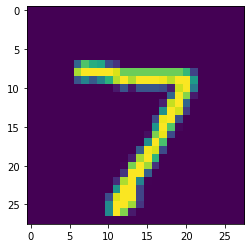

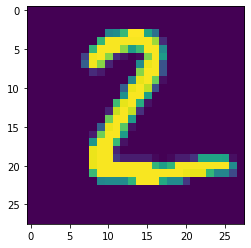

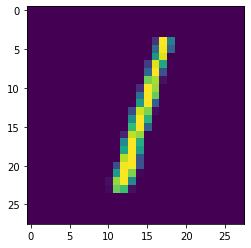

[[ 968    0    1    1    4    2    2    0    2    0]
 [   0 1106    1    2    0    1    2    0   22    1]
 [   9    2  984   14    0    0    7    2   14    0]
 [   1    0    3  983    0   16    0    2    4    1]
 [   1    0    0    0  948    7    6    0    5   15]
 [   3    0    0    3    0  879    1    0    5    1]
 [   5    1    1    0    4    3  935    0    9    0]
 [   1    2    8   23    1    1    0  971    1   20]
 [   0    0    3   10    6   17    0    0  934    4]
 [   4    2    0    7    9   19    0    0    3  965]]


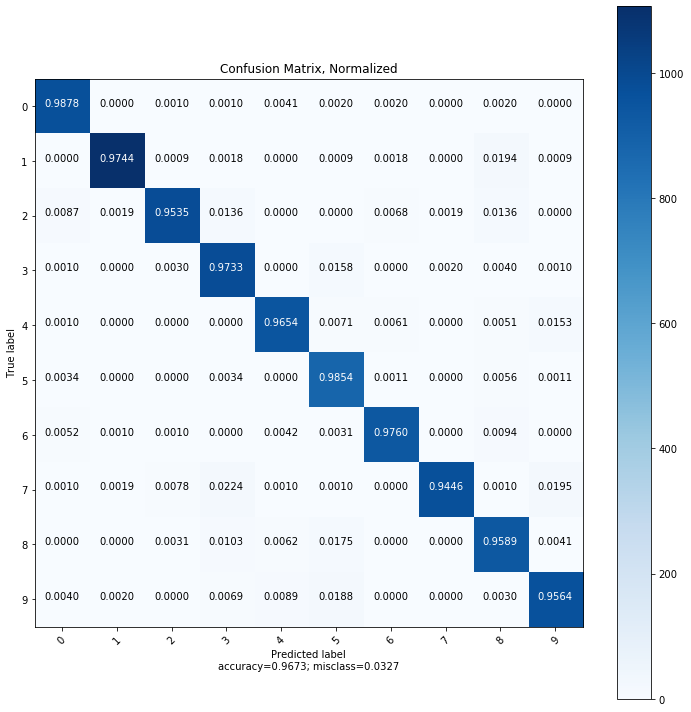

In [15]:
for i in range(0, 3):
    img = test_images[i]
    img = np.array(img, dtype = 'float')
    pixels = img.reshape((28, 28))
    plt.imshow(pixels)
    plt.show()

predictions = model.predict(test_images)
print(confusion_matrix(test_labels, np.argmax(predictions, axis = 1)))

plot_confusion_matrix(confusion_matrix(test_labels, np.argmax(predictions, axis = 1)), 
                      normalize    = True,
                      target_names = ['0', '1', '2',  '3',  '4', '5',  '6', '7',  '8', '9'],
                      title        = "Confusion Matrix, Normalized")

In [16]:
import pandas as pd
sub = pd.DataFrame(np.argmax(predictions, axis = 1))
sub.index.name = 'ImageId'
sub.index += 1
sub.columns = ['Label']
sub.to_csv("submission_ffann.csv", header = True) 